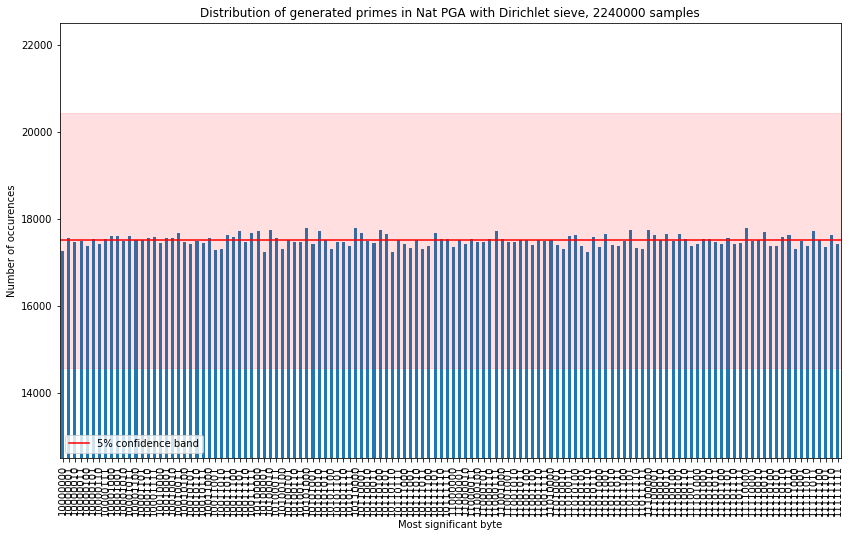

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d
from collections import Counter
import math

stock_files = sorted(glob("../data/distribution/nat/dirichlet_sieve/1strun_*.csv"))
df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)
byte_counts = Counter(df["byte"])
df = pd.DataFrame.from_dict(byte_counts, orient='index')

exp_dist = df.sum(0)[0]/len(byte_counts) # get expected occurences per bin
conf = 1.96

ax = df.sort_index().plot(kind='bar', legend=False, figsize=(14,8))
ax.axhspan(ymin=exp_dist-(conf*math.sqrt(2240000)), ymax=exp_dist+(conf*math.sqrt(2240000)), color='red', alpha=0.125) #draw 5% confidence band
ax.set_ylim(12500,22500)
ax.axhline(y=exp_dist,color='red')
ax.legend(["5% confidence band"], loc=3)
ax.locator_params(axis='y', integer=True)
ax.set_xlabel("Most significant byte")
ax.set_ylabel("Number of occurences")
ax.set_title("Distribution of generated primes in Nat PGA with Dirichlet sieve, 2240000 samples")
ax.get_figure().savefig("../plots/distribution_nat_dir.jpg", dpi=150)

